# 基于opencv的图像简单分割

In [1]:
import numpy as np
import cv2
from PIL import Image

orig_img = cv2.imread('./stark_coolone.jpg') #读入原始图像

gray = cv2.cvtColor(orig_img,cv2.COLOR_BGR2GRAY)  #灰度图
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print(type(ret),type(thresh))

<class 'float'> <class 'numpy.ndarray'>


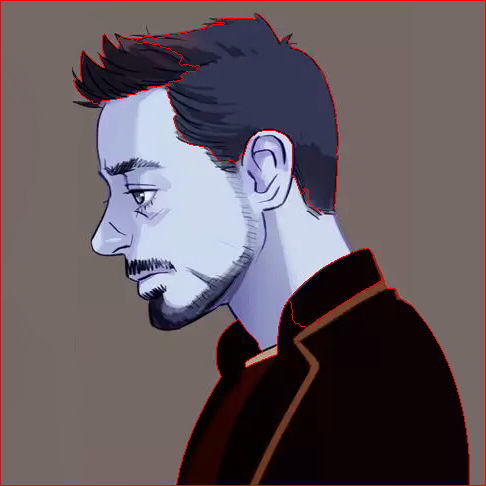

In [3]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)#膨胀

dist_transform = cv2.distanceTransform(opening,2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)#参数改小了，出现不确定区域

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)#减去前景
ret, markers = cv2.connectedComponents(sure_fg)


markers = markers+1


markers[unknown==255]=0

markers = cv2.watershed(orig_img,markers) #调用分水岭算法的函数
orig_img[markers == -1] = [255,0,0]  #采用红色标注

out_img=Image.fromarray(orig_img)

#out_img.show()
out_img
#分割结果

## 参考资料
- http://blog.csdn.net/tengfei461807914/article/details/77620216